# Global Metaheuristic Analysis

This notebook consolidates the outputs produced by every algorithm in the `results/` directory. It highlights the best configuration per dataset, visualizes quality/runtime distributions, and ranks the algorithms based on the quality they deliver for each TSP instance.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)


In [2]:
RESULTS_DIR = Path('../../results')
csv_files = sorted(RESULTS_DIR.glob('*/*.csv'))

records = []
meta_rows = []

for csv_path in csv_files:
    algorithm = csv_path.parent.name
    try:
        df = pd.read_csv(csv_path)
    except Exception as exc:
        print(f"⚠️ Failed to load {csv_path}: {exc}")
        continue

    if 'instance' not in df.columns:
        print(f"⚠️ Skipping {csv_path} -> missing 'instance' column")
        continue

    df = df.copy()
    df['algorithm'] = algorithm
    df['source_file'] = str(csv_path.relative_to(RESULTS_DIR))

    records.append(df)
    meta_rows.append({'algorithm': algorithm, 'file': df['source_file'].iloc[0], 'rows': len(df)})

if records:
    full_df = pd.concat(records, ignore_index=True)
else:
    raise ValueError("No result files were loaded. Please check the results directory.")

meta_df = pd.DataFrame(meta_rows)
print(f"Loaded {len(csv_files)} CSV files -> {len(full_df)} rows")
display(meta_df.sort_values(['algorithm', 'file']))

full_df.head()


Loaded 9 CSV files -> 17102 rows


,algorithm,file,rows
0,GA,GA/2025-11-27__23-26__174376_sec__results.csv,5184
1,GRASP,GRASP/2025-11-17__06-27__35633_sec__results.csv,1296
2,IHC,IHC/2025-11-15__18-46__2142_sec__with_delta__r...,576
3,IHC,IHC/2025-11-17__11-36__8598_sec__with_delta__r...,576
4,NN,NN/2025-11-17__13-01__0_sec__results.csv,254
5,SA,SA/2025-11-16__18-36__2480_sec__results.csv,2304
6,SA,SA/2025-11-16__19-18__2333_sec__results.csv,2304
7,SA,SA/2025-11-17__12-32__2360_sec__results.csv,2304
8,TS,TS/2025-11-16__16-45__52983_sec__tabu_move_res...,2304


,instance,population_size,generations,selection,crossover,mutation_type,mutation_prob,mean_cost,min_cost,mean_runtime,...,n_starts,max_iter,stop_no_improve,start_city,cost,runtime,T0,T_min,tabu_tenure,n_neighbors
0,Dane_TSP_48.xlsx,300.0,500.0,tournament,PMX,two_opt,0.2,10263.2,9961.0,12.713829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dane_TSP_48.xlsx,20.0,1000.0,tournament,CX,two_opt,0.3,10634.8,9962.0,1.017788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dane_TSP_48.xlsx,300.0,1000.0,tournament,PMX,two_opt,0.3,10377.6,9996.0,27.108038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dane_TSP_48.xlsx,300.0,500.0,tournament,PMX,insert,0.1,11326.4,10011.0,12.647300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dane_TSP_48.xlsx,100.0,1000.0,tournament,PMX,two_opt,0.2,10525.2,10011.0,8.225020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
instances = full_df['instance'].unique().tolist()
algorithms = full_df['algorithm'].unique().tolist()
print(f"Instances detected: {instances}")
print(f"Algorithms detected ({len(algorithms)}): {algorithms}")

agg_dict = {
    'runs': ('min_cost', 'size'),
    'best_min_cost': ('min_cost', 'min'),
    'avg_min_cost': ('min_cost', 'mean'),
}
if 'mean_runtime' in full_df.columns:
    agg_dict['avg_runtime'] = ('mean_runtime', 'mean')

summary = full_df.groupby(['instance', 'algorithm']).agg(**agg_dict).reset_index()
display(summary.head(20))


Instances detected: ['Dane_TSP_48.xlsx', 'Dane_TSP_76.xlsx', 'Dane_TSP_127.xlsx']
Algorithms detected (6): ['GA', 'GRASP', 'IHC', 'NN', 'SA', 'TS']


,instance,algorithm,runs,best_min_cost,avg_min_cost,avg_runtime
0,Dane_TSP_127.xlsx,GA,1728,118720.872,425068.557075,16.863099
1,Dane_TSP_127.xlsx,GRASP,432,126569.002,168135.773086,36.205186
2,Dane_TSP_127.xlsx,IHC,384,110829.054,211381.631953,11.423638
3,Dane_TSP_127.xlsx,NN,128,NaN,NaN,NaN
4,Dane_TSP_127.xlsx,SA,2304,112128.093,343720.255518,0.483054
5,Dane_TSP_127.xlsx,TS,768,109551.399,132838.856717,30.305522
6,Dane_TSP_48.xlsx,GA,1728,9961.000,24636.620949,7.586035
7,Dane_TSP_48.xlsx,GRASP,432,9809.000,10202.006944,17.082018
8,Dane_TSP_48.xlsx,IHC,384,9809.000,11901.359375,5.309861
9,Dane_TSP_48.xlsx,NN,49,NaN,NaN,NaN


In [4]:
best_overall_cols = ['instance', 'algorithm', 'min_cost', 'source_file']
if 'mean_runtime' in full_df.columns:
    best_overall_cols.insert(3, 'mean_runtime')

best_overall = (
    full_df.sort_values('min_cost')
    .groupby('instance', as_index=False)
    .first()[best_overall_cols]
)

print("Best configuration per dataset (lower min_cost is better):")
display(best_overall)



Best configuration per dataset (lower min_cost is better):


,instance,algorithm,min_cost,mean_runtime,source_file
0,Dane_TSP_127.xlsx,TS,109551.399,91.950594,TS/2025-11-16__16-45__52983_sec__tabu_move_res...
1,Dane_TSP_48.xlsx,GRASP,9809.000,23.598643,GRASP/2025-11-17__06-27__35633_sec__results.csv
2,Dane_TSP_76.xlsx,TS,97728.833,26.469794,TS/2025-11-16__16-45__52983_sec__tabu_move_res...



=== Distribution overview for Dane_TSP_127.xlsx ===


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/3097698897.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inst_df, x='algorithm', y='min_cost', ax=axes[0], palette='Set2')
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/3097698897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inst_df, x='algorithm', y='mean_runtime', ax=axes[1], palette='Set3')


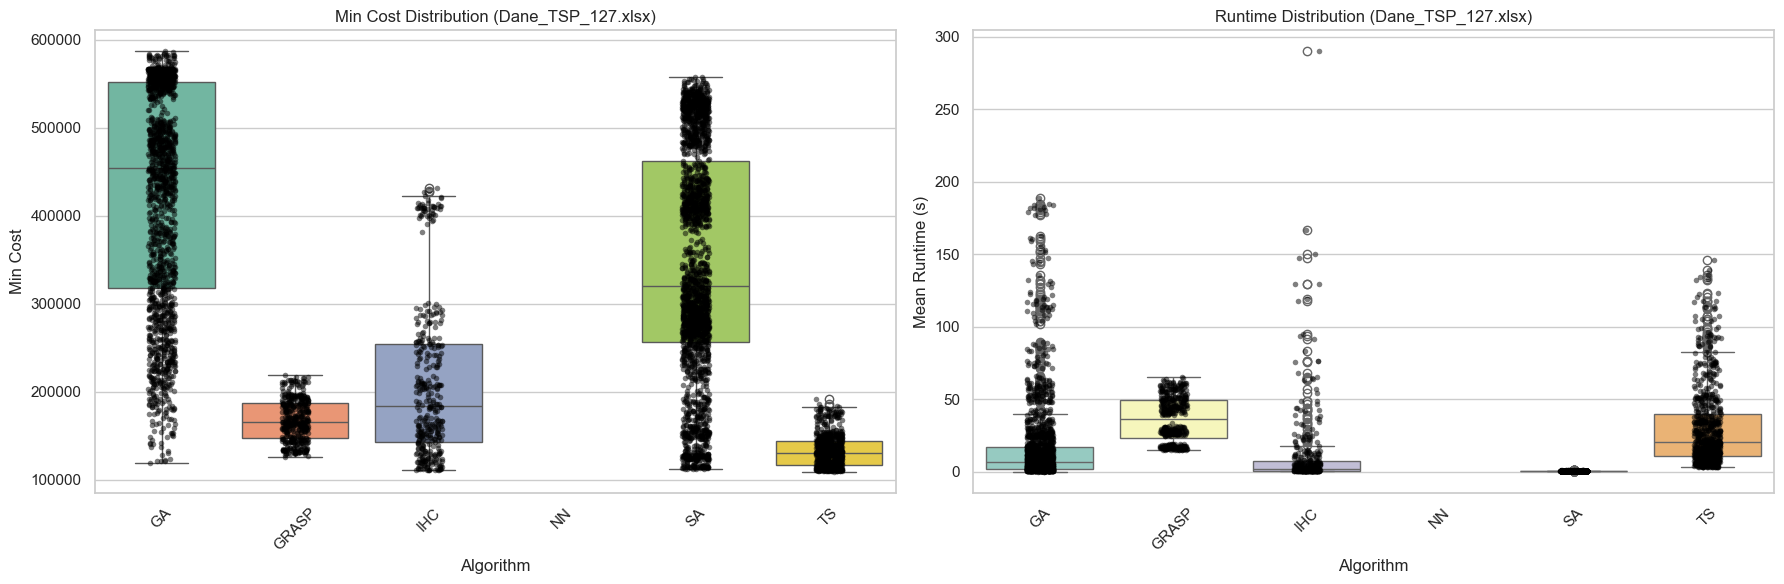


=== Distribution overview for Dane_TSP_48.xlsx ===


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/3097698897.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inst_df, x='algorithm', y='min_cost', ax=axes[0], palette='Set2')
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/3097698897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inst_df, x='algorithm', y='mean_runtime', ax=axes[1], palette='Set3')


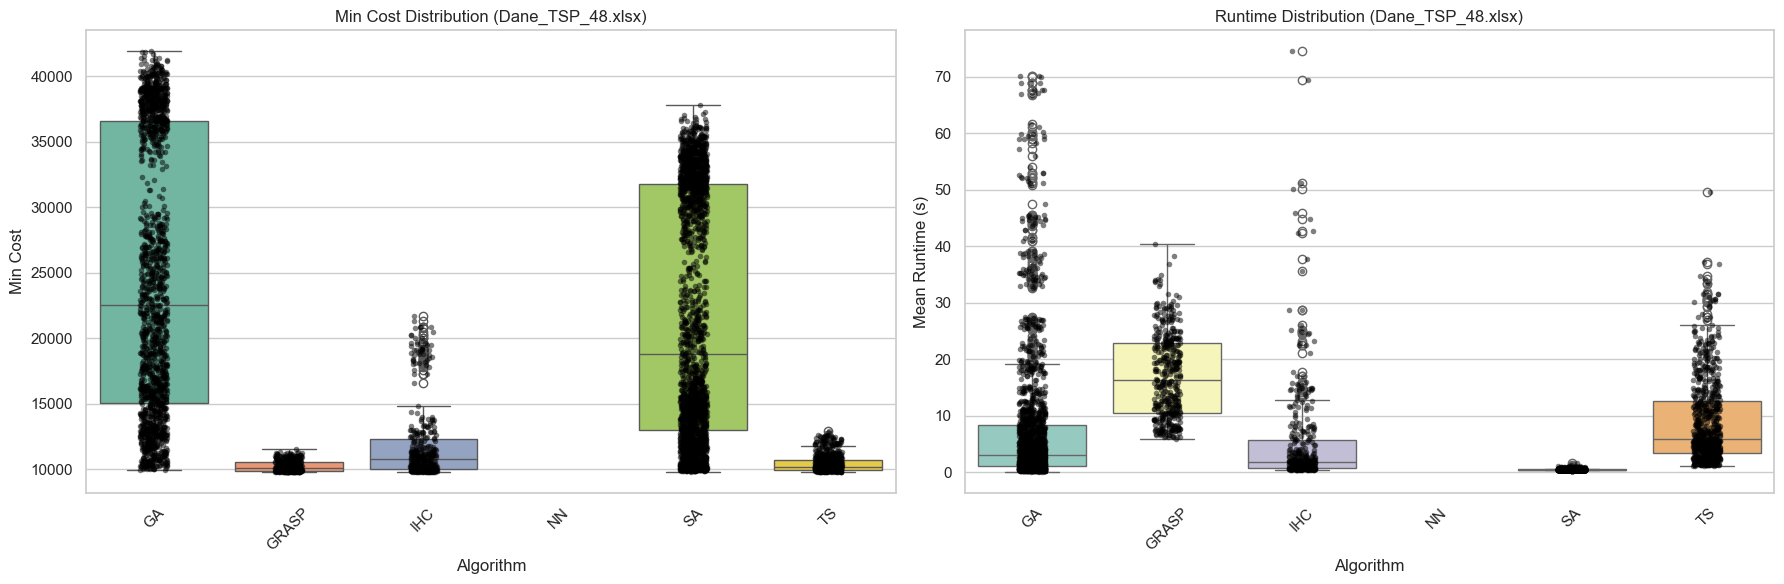


=== Distribution overview for Dane_TSP_76.xlsx ===


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/3097698897.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inst_df, x='algorithm', y='min_cost', ax=axes[0], palette='Set2')
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/3097698897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inst_df, x='algorithm', y='mean_runtime', ax=axes[1], palette='Set3')


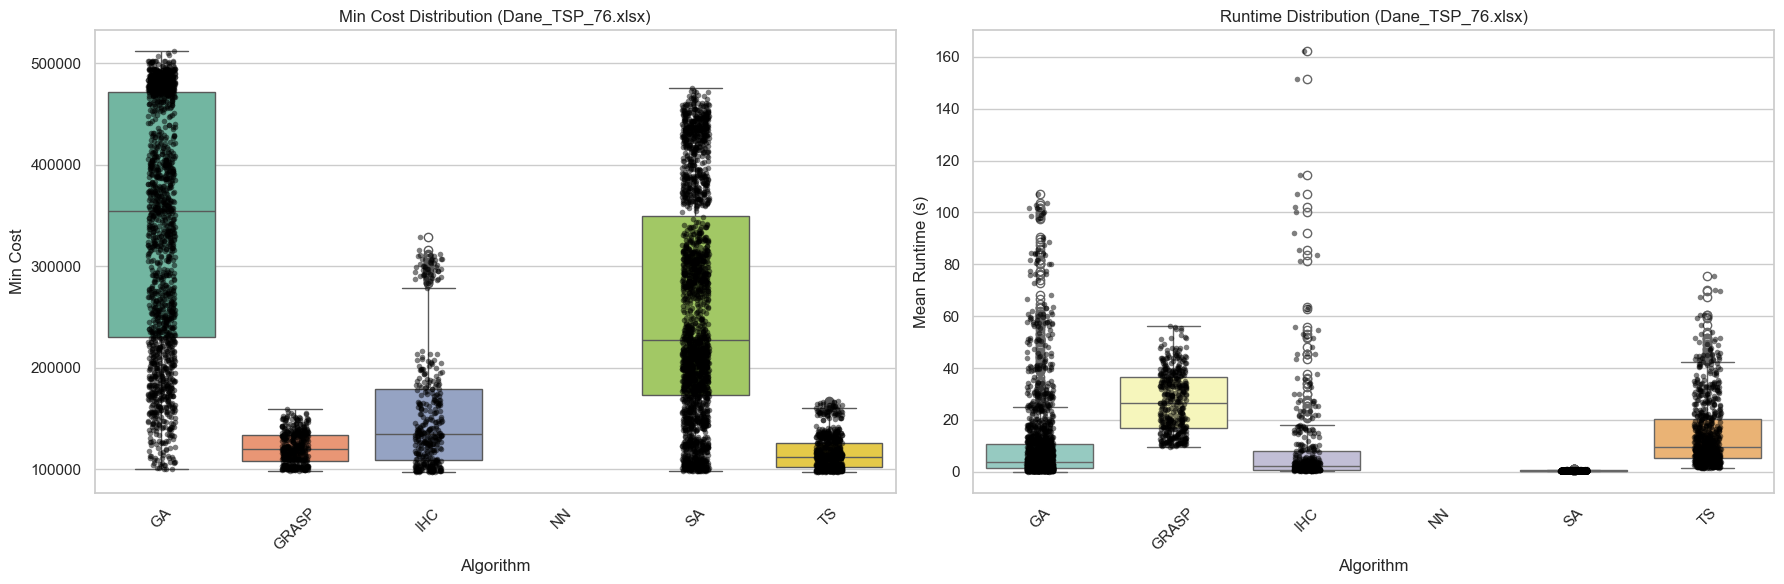

In [5]:
for instance, inst_df in full_df.groupby('instance'):
    print(f"\n=== Distribution overview for {instance} ===")
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=False)

    sns.boxplot(data=inst_df, x='algorithm', y='min_cost', ax=axes[0], palette='Set2')
    sns.stripplot(data=inst_df, x='algorithm', y='min_cost', ax=axes[0], color='black', size=4, alpha=0.5)
    axes[0].set_title(f"Min Cost Distribution ({instance})")
    axes[0].set_xlabel('Algorithm')
    axes[0].set_ylabel('Min Cost')
    axes[0].tick_params(axis='x', rotation=45)

    if 'mean_runtime' in inst_df.columns:
        sns.boxplot(data=inst_df, x='algorithm', y='mean_runtime', ax=axes[1], palette='Set3')
        sns.stripplot(data=inst_df, x='algorithm', y='mean_runtime', ax=axes[1], color='black', size=4, alpha=0.5)
        axes[1].set_title(f"Runtime Distribution ({instance})")
        axes[1].set_xlabel('Algorithm')
        axes[1].set_ylabel('Mean Runtime (s)')
        axes[1].tick_params(axis='x', rotation=45)
    else:
        axes[1].set_visible(False)

    plt.tight_layout()
    plt.show()


Algorithm ranking (lower avg_rank is better):


,algorithm,avg_rank,wins,datasets,best_mean_cost
5,TS,1.000000,3,3,72363.077333
2,IHC,1.333333,2,3,72788.962333
4,SA,2.666667,1,3,73372.684000
1,GRASP,3.000000,1,3,78127.877000
0,GA,4.666667,0,3,76251.360333
3,NN,NaN,0,3,NaN


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_71368/240157961.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking, x='algorithm', y='avg_rank', palette='Blues_r')


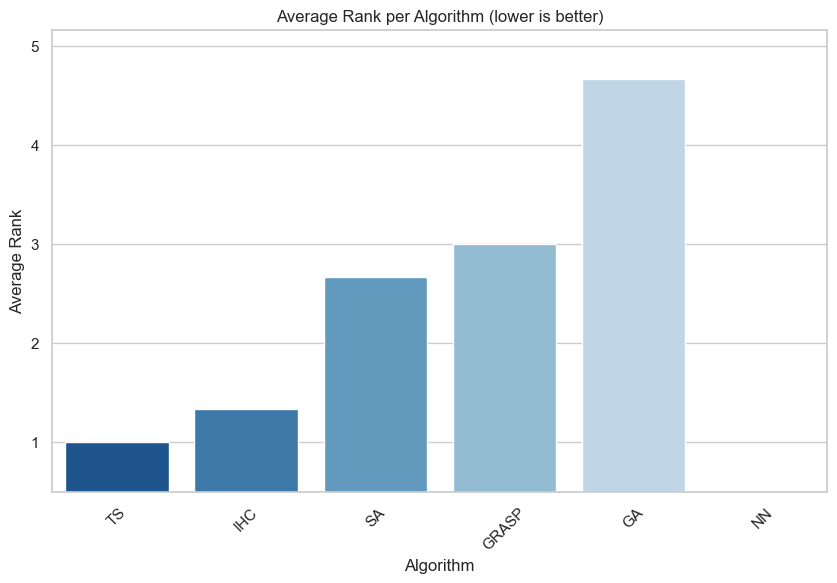

In [6]:
best_per_algo = (
    full_df.groupby(['instance', 'algorithm'])['min_cost']
    .min()
    .reset_index()
)

best_per_algo['rank'] = best_per_algo.groupby('instance')['min_cost'].rank(method='min', ascending=True)

ranking = (
    best_per_algo.groupby('algorithm')
    .agg(
        avg_rank=('rank', 'mean'),
        wins=('rank', lambda r: (r == 1).sum()),
        datasets=('instance', 'nunique'),
        best_mean_cost=('min_cost', 'mean')
    )
    .reset_index()
    .sort_values('avg_rank')
)

print("Algorithm ranking (lower avg_rank is better):")
display(ranking)

plt.figure(figsize=(10, 6))
sns.barplot(data=ranking, x='algorithm', y='avg_rank', palette='Blues_r')
plt.title('Average Rank per Algorithm (lower is better)')
plt.xlabel('Algorithm')
plt.ylabel('Average Rank')
plt.ylim(0.5, ranking['avg_rank'].max() + 0.5)
plt.xticks(rotation=45)
plt.show()


## Notes
- "Best configuration" is defined by the lowest `min_cost` observed for a dataset, regardless of runtime.
- Ranking uses per-dataset ordering of those best `min_cost` values (rank 1 = best). The bar chart therefore reflects average placement across all datasets; lower bars indicate algorithms that consistently deliver superior tours.
- Box/strip plots expose the spread of solutions per algorithm, helping you spot unstable methods even if they occasionally win.
